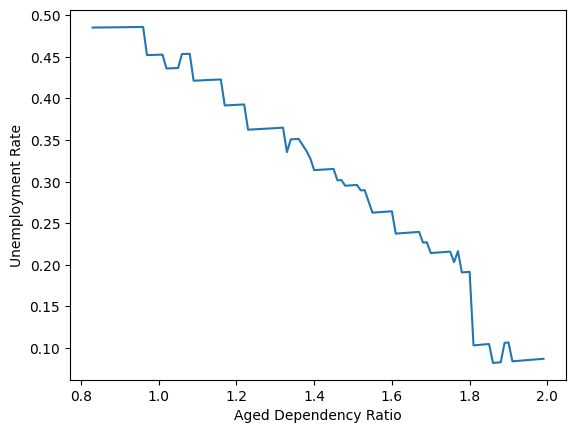

In [29]:
# solve the system of nonlinear equations in aging labor market and unemployment 
# method 1: fsolve

import scipy
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

s = 0.6 # the bargaining power of the workers
psi_e = 0
psi_u = 0.5
psi_a = 1
n = 1
y_u = 0.4
y_a = 0.4
bar_p = 1
c = 0.2

# let the matching function in labor market 
# m(u,v)=kappa*u**zeta*v**(1-zeta) 
# then q(theta) = m(u,v)/v = kappa*theta**(-zeta),f(theta) = m(u,v)/u = kappa*theta**(1-zeta) 

kappa = 0.5
zeta = 0.35

def equations(p):
    u, theta, pi = p
# use np.sign(a)*(np.abs(a))**(-zeta) to avoid Numpy not allowing fractional powers of negative numbers
    q = kappa*np.sign(theta)*(np.abs(theta)) ** (-zeta)
    f = theta*q
    b = (n-u)*(1+psi_e)+u*(1+psi_u)+a*(1+psi_a)
    w = (1-s)*y_u + s*pi
    
    return (c-q*(1-s)*(pi-y_u), 
            (n-u)*(1+psi_e)/b*(1-2*psi_e/(1+psi_e)*(n-u)/b
                              )*w/bar_p*(bar_p-c)
            +u*(1+psi_u)/b*(1-2*psi_u/(1+psi_u)*(n-u)/b
                              )*y_u/bar_p*(bar_p-c)
            +a*(1+psi_a)/b*(1-2*psi_a/(1+psi_a)*(n-u)/b
                              )*y_a/bar_p*(bar_p-c)
            -pi,
            u-n*(1-f)-(n-u)*s
           )


unemp = []
tight_labor = []
net_profit = []
aging = []

for a in np.arange(0, 2, 0.01):
    u, theta, pi=  fsolve(equations, (0.01, 1, 0.1))
    if u > 0 and u < 0.5:
        unemp.append(u)
        tight_labor.append(theta)
        net_profit.append(pi)
        aging.append(a)

#aging = np.arange(0.01, 2, 0.1)
plt.figure()
#plt.subplot(311)
plt.plot(aging, unemp)
plt.xlabel('Aged Dependency Ratio')
plt.ylabel('Unemployment Rate')

"""
plt.subplot(312)
plt.plot(aging, tight_labor)
#plt.xlabel('Aged Dependency Ratio')
plt.ylabel('labor market tightness')

plt.subplot(313)
plt.plot(aging, net_profit)
plt.xlabel('Aged Dependency Ratio')
plt.ylabel('net profit')

"""

plt.show()


In [13]:
len(tight_labor)

13

In [10]:
unemp

[0.49680488198763867,
 0.45271785066345643,
 0.4527042446153142,
 0.45269081007720247,
 0.45267753701385777,
 0.44042439992845217,
 0.4519648755309079,
 0.4275896375340289,
 0.4275768312695414,
 0.4033933347706036,
 0.4033824821372097,
 0.4033717508709044,
 0.40290626587719114,
 0.33799771320551125,
 0.39838973060936617,
 0.35008964175221224,
 0.34655332848277876,
 0.34654330209061135,
 0.346533383385068,
 0.34875512129134284,
 0.34776218771773865,
 0.3477528035752999,
 0.3959312047139068,
 0.39592239265840223,
 0.3372715059064459,
 0.3548574086620257,
 0.31984556943191833,
 0.3198366005156107,
 0.31982774531209723,
 0.31981898097256933,
 0.31981031019435774,
 0.31980172276899393,
 0.31979322118623765,
 0.3197848074538229,
 0.36684823045419385,
 0.366840157530004,
 0.3668321619458109,
 0.2858892159552936,
 0.2858811238888608,
 0.27546587083485286,
 0.2754578204656793,
 0.27544983363284753,
 0.275441928881025,
 0.27543407758534677,
 0.2876590111062446,
 0.2876512880775117,
 0.2876436485